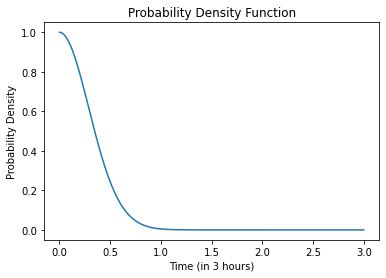

NameError: name 'f' is not defined

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.integrate as integrate

step = 1/60
ksi5= 0.282828282828
ksi6= 8
ksi7= 0.717171717171
ksi8=5

# Create a range of values for y from 0 to 3 hours, in increments of 1 minute
y_range = np.arange(0, 3.01, step)

# Evaluate f(y) at each value of y
f_y = ksi5*np.exp(-ksi6*y_range**2) + ksi7*np.exp(-ksi8*y_range**2)

# Plot the PDF graph
plt.plot(y_range, f_y)
plt.title('Probability Density Function')
plt.xlabel('Time (in 3 hours)')
plt.ylabel('Probability Density')
plt.show()

y2_range = np.arange(0, 5.01, 1/60)
f2_y = ksi5*np.exp(-ksi6*y_range**2) + ksi7*np.exp(-ksi8*y_range**2)

# Plot the PDF graph
#plt.plot(y2_range, f2_y)
#plt.title('Probability Density Function')
#plt.xlabel('Time in (10 hours)')
#plt.ylabel('Probability Density')
#plt.show()

#y3_range = np.arange(0, 5.01, 1/60)
#f3_y = ksi5*np.exp(-ksi6*y3_range**2) + ksi7*np.exp(-ksi8*y3_range**2)

y3 = np.linspace(0, 5, 1000)  # in hours
pdf = f(y3)  # probability density function
bins = np.arange(0, 5*60+1, 1)  # in minutes
hist, _ = np.histogram(np.random.choice(y3, size=int(1e6), p=pdf/np.sum(pdf))*60, bins=bins, density=True)


# Plot the histogram

plt.hist(bins[:-1], bins, weights=hist, label="Histogram of the waiting time function", alpha=1)
#plt.hist(y3_range, weights=f3_y, bins=50)
plt.title('Histogram')
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density')
plt.show()



a = 2  # in hours
b = 4  # in hours
prob, _ = integrate.quad(f, a, b)
print(f"The probability of waiting between {a} and {b} hours is {prob}")


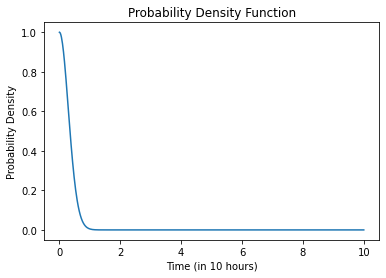

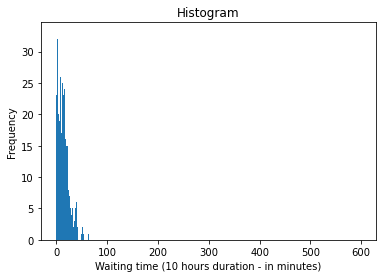

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import math

step = 1/60
ksi5= 0.282828282828
ksi6= 8
ksi7= 0.717171717171
ksi8=5

# Create a range of values for y from 0 to 10 hours, in increments of 1 hour
y_range = np.arange(0, 10.01, step)

# Evaluate f(y_range) at each value of y
f_y = ksi5*np.exp(-ksi6*y_range**2) + ksi7*np.exp(-ksi8*y_range**2)

# Plot the PDF graph
plt.plot(y_range, f_y)
plt.title('Probability Density Function')
plt.xlabel('Time (in 10 hours)')
plt.ylabel('Probability Density')
plt.show()

def waiting_time_pdf(y):
    return 0.2828282828*np.exp(-8*y**2)+0.717171717171*np.exp(-5*y**2)


#Define the range of waiting times in hours
y_range4 = np.linspace(0,10,600)

#f_y4=ksi5*np.exp(-ksi6*y_range4**2) + ksi7*np.exp(-ksi8*y_range4**2)

#Compute the waiting time histogram in minutes
minute_per_hour4 = 60
minute_per_bin4 = 1
pdf4 = waiting_time_pdf(y_range4) / minute_per_hour4
bins4 = np.arange(0, 600, minute_per_bin4)
hist4, bin_edges4 = np.histogram(np.random.choice(y_range4, size = 600, p=pdf4/np.sum(pdf4)) * minute_per_hour4, bins = bins4)

#plot the histogram
plt.bar(bin_edges4[:-1], hist4, width=minute_per_bin4)
plt.title('Histogram')
plt.xlabel('Waiting time (10 hours duration - in minutes)')
plt.ylabel('Frequency')
plt.show()


Mean:, 0.089
Variance:, 0.021
Quartile 1 or 25th percentile:, 0.095
Quartile 2 or 505th percentile:, 0.201
Quartile 3 or 75th percentile:, 0.345


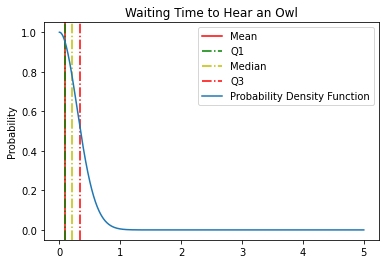

In [19]:
import numpy as np
from scipy.integrate import quad
from scipy import optimize

def f(y):
    return 0.282828282828282828282828282828282828 * np.exp(-8*y**2) + 0.7171717171717171717171717171717171 * np.exp(-5*y**2)

mean, _ = quad(lambda y: y*f(y), 0, np.inf)
variance, _ = quad(lambda y: (y-mean)**2*f(y), 0, np.inf)

print(f"Mean:, {mean:.3f}")
print(f"Variance:, {variance:.3f}")

# Define a function to calculate the integral of f(y) from 0 to y
def F(y):
    return quad(f, 0, y)[0]

# Find the quartiles by solving for the values of y where F(y)/F(inf) is 0.25, 0.5, and 0.75
# Using the quad function from the scipy.integrate module to numerically integrate the function f(y) from 0 to infinity. 
# The result of this integration is assigned to the variable F_inf.

F_inf = quad(f, 0, np.inf)[0]

# The line q1 = optimize.brentq(lambda y: F(y)/F_inf - 0.25, 0, 10) is using the brentq function from the scipy.optimize module 
# to find the root of the lambda function lambda y: F(y)/F_inf - 0.25 in the interval from 0 to 10 hours. The root of this 
# function is the value of y that satisfies the equation ∫[0, y] f(y)dy = 0.25. 
# The value of this root is assigned to the variable q1.
q1 = optimize.brentq(lambda y: F(y)/F_inf - 0.25, 0, 10)
q2 = optimize.brentq(lambda y: F(y)/F_inf - 0.5, 0, 10)
q3 = optimize.brentq(lambda y: F(y)/F_inf - 0.75, 0, 10)


y = np.linspace(0, 5, 1000)  # in hours
pdf = f(y)  # probability density function
bins = np.arange(0, 5*60+1, 1)  # in minutes
hist, _ = np.histogram(np.random.choice(y, size=int(1e6), p=pdf/np.sum(pdf))*60, bins=bins, density=True)

print(f"Quartile 1 or 25th percentile:, {q1:.3f}")
print(f"Quartile 2 or 505th percentile:, {q2:.3f}")
print(f"Quartile 3 or 75th percentile:, {q3:.3f}")
plt.axvline(mean, color="r", linestyle="-", label="Mean")
plt.axvline(q1, color="g", linestyle="-.", label="Q1")
plt.axvline(q2, color="y", linestyle="-.", label="Median")
plt.axvline(q3, color="r", linestyle="-.", label="Q3")
#plt.plot(y, pdf, label="")
plt.plot(y, pdf, label="Probability Density Function")
plt.ylabel("Probability")
plt.title("Waiting Time to Hear an Owl")
plt.legend()
plt.show()


Mean:, 0.089
Variance:, 0.021
The probability of waiting between 2 and 4 hours is 
 7.218616392718676e-11
The probability of waiting between 2 and infiniti hours is 
 7.218616387159546e-11
The probability of waiting between 4 and infiniti hours is 
 3.21611396039975e-37
The probability of waiting between 2 to 4 and infiniti hours is 
 7.218616387159546e-11
Quartile 1 or 25th percentile:, 0.095
Quartile 2 or 505th percentile:, 0.201
Quartile 3 or 75th percentile:, 0.345


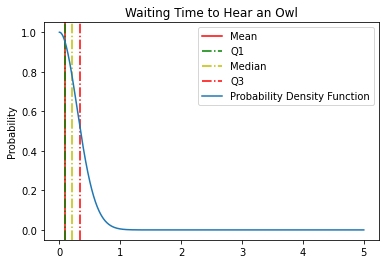

In [16]:
import numpy as np
from scipy.integrate import quad
from scipy import optimize

def f(y):
    return 0.282828282828282828282828282828282828 * np.exp(-8*y**2) + 0.7171717171717171717171717171717171 * np.exp(-5*y**2)

mean, _ = quad(lambda y: y*f(y), 0, np.inf)
variance, _ = quad(lambda y: (y-mean)**2*f(y), 0, np.inf)

print(f"Mean:, {mean:.3f}")
print(f"Variance:, {variance:.3f}")

# Define a function to calculate the integral of f(y) from 0 to y
def F(y):
    return quad(f, 0, y)[0]


a = 2  # in hours
b = 4  # in hours
prob, _ = quad(f, a, b)
print(f"The probability of waiting between {a} and {b} hours is \n {prob}")

prob2, _ = quad(f, a, np.inf)
print(f"The probability of waiting between {a} and infiniti hours is \n {prob2}")

prob4, _ = quad(f, b, np.inf)
print(f"The probability of waiting between {b} and infiniti hours is \n {prob4}")

prob2to4 = prob2-prob4
print(f"The probability of waiting between 2 to 4 and infiniti hours is \n {prob2to4}")

# Find the quartiles by solving for the values of y where F(y)/F(inf) is 0.25, 0.5, and 0.75
# Using the quad function from the scipy.integrate module to numerically integrate the function f(y) from 0 to infinity. The result of this integration is assigned to the variable F_inf.

F_inf = quad(f, 0, np.inf)[0]

# The line q1 = optimize.brentq(lambda y: F(y)/F_inf - 0.25, 0, 10) is using the brentq function from the scipy.optimize module to find the root of the lambda function lambda y: F(y)/F_inf - 0.25 in the interval from 0 to 10. The root of this function is the value of y that satisfies the equation ∫[0, y] f(y)dy = 0.25. The value of this root is assigned to the variable q1.
q1 = optimize.brentq(lambda y: F(y)/F_inf - 0.25, 0, 10)
q2 = optimize.brentq(lambda y: F(y)/F_inf - 0.5, 0, 10)
q3 = optimize.brentq(lambda y: F(y)/F_inf - 0.75, 0, 10)


y = np.linspace(0, 5, 1000)  # in hours
pdf = f(y)  # probability density function
bins = np.arange(0, 5*60+1, 1)  # in minutes
hist, _ = np.histogram(np.random.choice(y, size=int(1e6), p=pdf/np.sum(pdf))*60, bins=bins, density=True)

print(f"Quartile 1 or 25th percentile:, {q1:.3f}")
print(f"Quartile 2 or 505th percentile:, {q2:.3f}")
print(f"Quartile 3 or 75th percentile:, {q3:.3f}")
plt.axvline(mean, color="r", linestyle="-", label="Mean")
plt.axvline(q1, color="g", linestyle="-.", label="Q1")
plt.axvline(q2, color="y", linestyle="-.", label="Median")
plt.axvline(q3, color="r", linestyle="-.", label="Q3")
#plt.plot(y, pdf, label="")
plt.plot(y, pdf, label="Probability Density Function")
plt.ylabel("Probability")
plt.title("Waiting Time to Hear an Owl")
plt.legend()
plt.show()
